<a href="https://colab.research.google.com/github/Dhirendra719/3rd-Physics/blob/main/GM_Counter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit






In [ ]:
# Load CSV data
df = pd.read_csv('https://raw.githubusercontent.com/Dhirendra719/3rd-Physics/refs/heads/main/voltage_count_data%20(2).csv')
df.head()

,S.N.,Voltage (Volts),Count 1,Count 2,Count 3,Count 4,Count 5,Mean per 30 sec,Mean per sec
0,1,300,0,0,0,0,0,0.0,0.000000
1,2,325,0,0,0,0,0,0.0,0.000000
2,3,350,226,262,550,773,772,516.6,17.220000
3,4,375,776,918,871,849,881,859.0,28.633333
4,5,400,882,860,820,716,820,819.6,27.320000


In [ ]:

# Use Voltage and Mean per 30 sec
x = df["Voltage (Volts)"]
y = df["Mean per sec"]

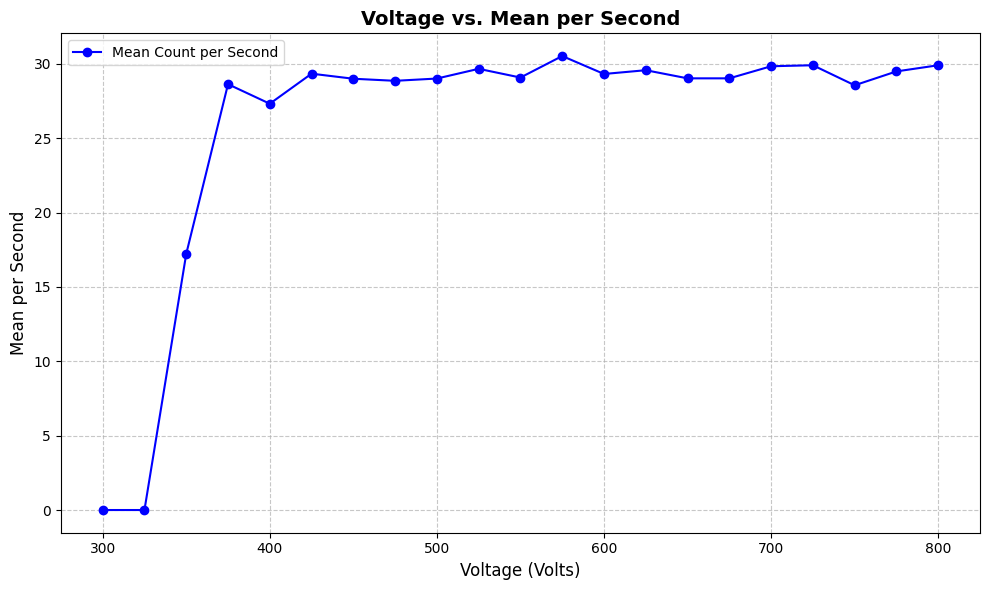

In [ ]:
# prompt: line plot between voltage and mean per second add voltage in x axis and mean in y axis
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Mean Count per Second')

# Add labels, title, legend, and grid
plt.xlabel("Voltage (Volts)", fontsize=12)
plt.ylabel("Mean per Second", fontsize=12)
plt.title("Voltage vs. Mean per Second", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Beautify the plot
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


Plateau region found from 375V to 800V with length 18


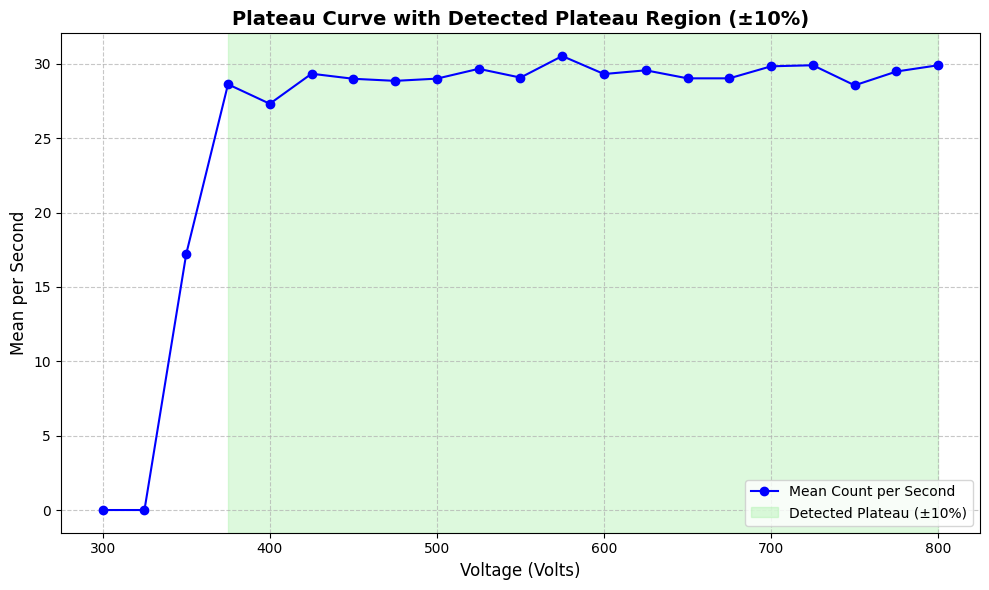

In [23]:
# Find plateau region with ±10% variation
best_start = 0
best_end = 0
max_len = 0

for i in range(len(y)):
    for j in range(i + 2, len(y)):  # at least 2 points
        sub_y = y[i:j + 1]
        avg = sum(sub_y) / len(sub_y)
        low = avg * 0.9
        high = avg * 1.1
        if all(low <= val <= high for val in sub_y):
            if (j - i + 1) > max_len:
                max_len = j - i + 1
                best_start = i
                best_end = j

# Get voltage range
plateau_start = x[best_start]
plateau_end = x[best_end]
print(f"Plateau region found from {plateau_start}V to {plateau_end}V with length {max_len}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Mean Count per Second')

# Highlight plateau region
plt.axvspan(plateau_start, plateau_end, color='lightgreen', alpha=0.3, label='Detected Plateau (±10%)')

# Labels and styling
plt.xlabel("Voltage (Volts)", fontsize=12)
plt.ylabel("Mean per Second", fontsize=12)
plt.title("Plateau Curve with Detected Plateau Region (±10%)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
V1 = x[best_start]
V2 = x[best_end]
Vo = V1 + (1/3) * (V2 - V1)
print(f"Operating Voltage (Vo) = {Vo:.2f} V using Vo = V1 + 1/3*(V2 - V1)")


Operating Voltage (Vo) = 516.67 V using Vo = V1 + 1/3*(V2 - V1)
